# DSCI 100 Project Final Report

Miyuki, Jane, Rachel & Meg

### Introduction



We will be exploring video games and the people who play video games, specifically the game MineCraft. To do this, play sessions are being recorded as well as individual player information. This includes information such as a players demographic information, playing time, and their skill. From this, data sets are created and will be used for analysis and understanding.

To help determine “kinds” of players, our project aims to analyze the relationship between the age and the time played of players in the dataset.

The dataset that we will be using to determine the relationship between “age” and “time_played” is the “players.csv” data set. This data set contains information about the players experience, subscription status, hashedEmail, played_hours, name, gender and age. Since this data contains information on both the age and the played hours, this will be the most relevant in determining the relationship between the 2.

### Methods and Results

In [23]:
set.seed(500)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(scales)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [2]:
url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players <- read_csv(url)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
url_2 <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
sessions<- read_csv(url_2)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
players_tidy_exp <- players |>
mutate(experience_num = case_when(experience == "Veteran" ~ 5,
                                  experience == "Beginner" ~ 1,
                                  experience == "Amateur" ~ 2,
                                 experience == "Regular" ~ 3,
                                 experience == "Pro" ~ 4,))
players_tidy_exp

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName,experience_num
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,4
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA,5
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA,2
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA,2
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA,4


In [5]:
players_gender_new <- players_tidy_exp |>
mutate(gender = case_when(gender == "Male" ~ "Male",
                          gender == "Female"~ "Female",
                          TRUE ~ "Other"))
players_gender_new

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName,experience_num
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,4
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA,5
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Other,17,NA,NA,2
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA,2
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA,4


In [6]:
players_tidy_new <- players_gender_new |>
mutate(gender_male = case_when(gender == "Male" ~ 1,
                               gender == "Female" ~ 0,
                               gender == "Other" ~ 0),
       gender_female = case_when(gender == "Male" ~ 0,
                                 gender == "Female" ~ 1,
                                 gender == "Other" ~ 0),
       gender_other = case_when(gender == "Male" ~ 0,
                                 gender == "Female" ~ 0,
                                 gender == "Other" ~ 1))
players_tidy_new

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName,experience_num,gender_male,gender_female,gender_other
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,4,1,0,0
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA,5,1,0,0
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA,5,1,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Other,17,NA,NA,2,0,0,1
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA,2,1,0,0
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA,4,0,0,1


In [8]:
#Tidying our dataset of interest, players.csv

players_tidy <- players_tidy_new |>
select(played_hours, age, experience_num, gender_male, gender_female, gender_other)

players_tidy

played_hours,age,experience_num,gender_male,gender_female,gender_other
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
30.3,9,4,1,0,0
3.8,17,5,1,0,0
0.0,17,5,1,0,0
⋮,⋮,⋮,⋮,⋮,⋮
0.0,17,2,0,0,1
2.3,17,2,1,0,0
0.2,91,4,0,0,1


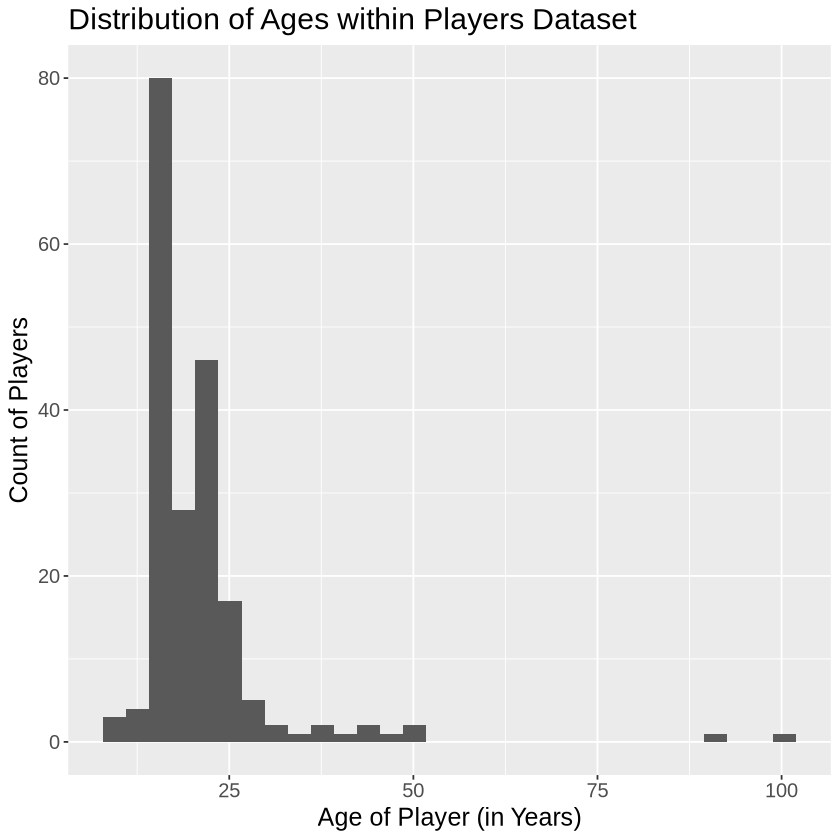

In [9]:
#SUMMARY OF DATA: Finding the distribution of ages within dataset

players_age_plot <- players_tidy |>
    ggplot(aes(x = age)) +
    geom_histogram(bins = 30) +
    labs(x = "Age of Player (in Years)",
        y = "Count of Players") +
    theme(text = element_text(size = 15)) +
    ggtitle("Distribution of Ages within Players Dataset")

players_age_plot

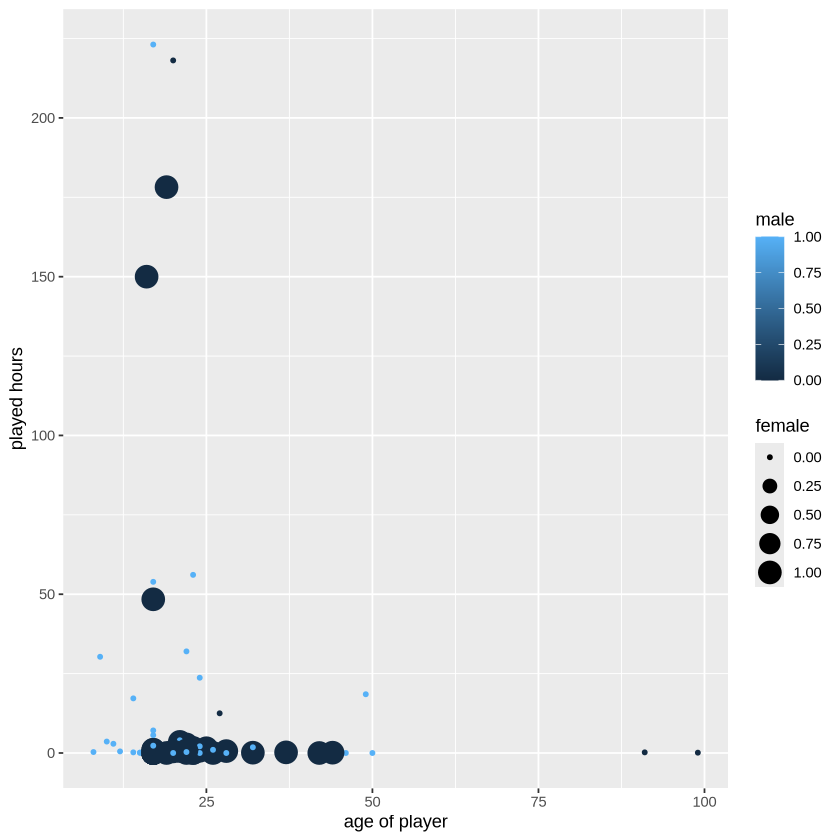

In [60]:
played_gender_plot <- ggplot(players_tidy, aes(x=age, y=played_hours, color=gender_male, size=gender_female)) +
geom_point() +
labs(x="age of player", y="played hours",color = "male", size = "female", shape = "other gender")
played_gender_plot

In [12]:
#SUMMARY OF DATA: Calculating the mean number of hours each age spends playing

players_mean <- players_tidy |>
group_by(age) |>
summarize(mean_hours = mean(played_hours))

players_mean

age,mean_hours
<dbl>,<dbl>
8,0.3
9,30.3
10,3.6
⋮,⋮
50,0.0
91,0.2
99,0.1


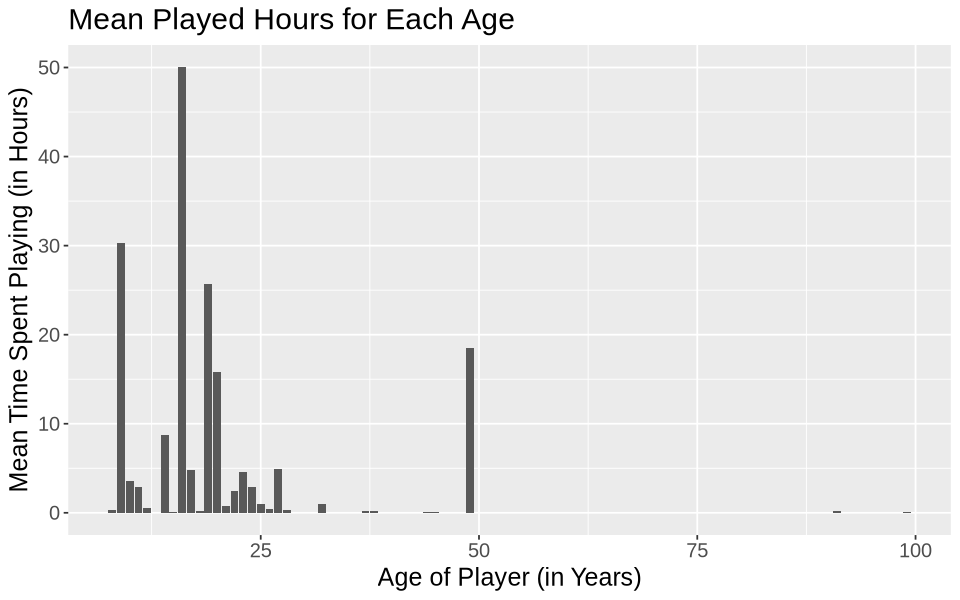

In [7]:
options(repr.plot.width = 8, repr.plot.height = 5)

players_summary_plot <- players_mean |>
    ggplot(aes(x = age, y = mean_hours)) +
    geom_bar(stat = "identity") +
    labs(x = "Age of Player (in Years)",
        y = "Mean Time Spent Playing (in Hours)") +
    theme(text = element_text(size = 15)) +
    ggtitle("Mean Played Hours for Each Age")

players_summary_plot

In [58]:
set.seed(7777)

players_split <- initial_split(players_tidy, prop = 0.75, strata = played_hours)
training_set <- training(players_split) 
testing_set <- testing(players_split)

players_recipe <- recipe(played_hours ~ age + experience_num + gender_male + gender_female + gender_other, data = training_set)  |>
step_scale(all_predictors()) |>
step_center(all_predictors())

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("regression")

vfold <- vfold_cv(training_set, v = 5, strata = played_hours)

gridvals <- tibble(neighbors = seq(from =1, to = 10, by = 1))

players_results <- workflow() |>
add_recipe(players_recipe) |>
add_model(players_spec) |>
tune_grid(resamples = vfold, grid = gridvals) |>
collect_metrics() |>
filter(.metric == "rmse")

players_min <- players_results|>
filter(mean == min(mean))


players_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,rmse,standard,20.68738,5,6.846683,Preprocessor1_Model03


In [21]:
players_gen <- data.frame(id = c(1,2,3,4,5,6,7),
                            gender = c("Male", "Female", "Non-binary", "Agender", "Two-Spirited", "Prefer not to say", "Other"))
players_gen

#dummify the data

dummy_players <- dummyVars("~.", data = players_gen)
trsf <- data.frame(predict(dummy_players, newdata = players_gen))
trsf

id,gender
<dbl>,<chr>
1,Male
2,Female
3,Non-binary
⋮,⋮
5,Two-Spirited
6,Prefer not to say
7,Other


ERROR: Error in dummyVars("~.", data = players_gen): could not find function "dummyVars"


In [21]:
players_tidy_new <- players_tidy |>


played_hours,age,gender
<dbl>,<dbl>,<chr>
30.3,9,players_gen
3.8,17,players_gen
0.0,17,players_gen
⋮,⋮,⋮
0.0,17,players_gen
2.3,17,players_gen
0.2,91,players_gen


ERROR: Error in mutate(players_tidy, experience_num = case_when(experience == : could not find function "mutate"


In [ ]:
players_tidy_new <- players_tidy |>
mutate(gender_male = case_when(gender == "Male" ~ 1,
                               gender == "Female" ~ 0,
                               gender == "Other" ~ 0),
       gender_female = case_when(gender == "Male" ~ 0,
                                 gender == "Female" ~ 1,
                                 gender == "Other" ~ 0),
       gender_other = case_when(gender == "Male" ~ 0,
                                 gender == "Female" ~ 0,
                                 gender == "Other" ~ 1))
       players_tidy_new

### Discussion

### References